# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.RandomState = 42

import pickle
from pickle import load

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Мы зафиксировали сиды для того, чтобы, пока мы будем улучшать модель, тестовые и тренировочные данные были фиксированы. Тогда изменение качества модели будет только следствием самого изменения модели, а не отчасти случайностью.")

Мы зафиксировали сиды для того, чтобы, пока мы будем улучшать модель, тестовые и тренировочные данные были фиксированы. Тогда изменение качества модели будет только следствием самого изменения модели, а не отчасти случайностью.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
# your code here
df_train.iloc[random.sample(range(0, df_train.shape[0]), 10)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
5238,Ford Freestyle Trend Diesel BSIV,2018,675000,60000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
912,Mercedes-Benz E-Class E250 CDI Avantgarde,2016,2900000,31000,Diesel,Dealer,Automatic,First Owner,13.0 kmpl,2143 CC,204 bhp,500Nm@ 1600-1800rpm,5.0
204,Hyundai Creta 1.6 CRDi SX Plus Dual Tone,2017,1100000,37000,Diesel,Individual,Manual,First Owner,19.67 kmpl,1582 CC,126.2 bhp,259.9Nm@ 1900-2750rpm,5.0
6074,Toyota Innova 2.5 E Diesel MS 8-seater,2007,409999,248119,Diesel,Individual,Manual,Fourth & Above Owner,12.8 kmpl,2494 CC,102 bhp,20.4@ 1400-3400(kgm@ rpm),8.0
2253,Maruti Wagon R LXI CNG,2011,200000,137000,CNG,Individual,Manual,First Owner,26.2 km/kg,998 CC,58.2 bhp,77Nm@ 3500rpm,5.0
2006,Maruti Wagon R LXI BS IV,2016,350000,70000,Petrol,Individual,Manual,First Owner,20.51 kmpl,998 CC,67.04 bhp,90Nm@ 3500rpm,5.0
1828,Maruti Swift Dzire LDi,2010,215000,120000,Diesel,Individual,Manual,Third Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
1143,Maruti Celerio VDi,2015,250000,100000,Diesel,Individual,Manual,Second Owner,27.62 kmpl,793 CC,47 bhp,125Nm@ 2000rpm,5.0
6033,Hyundai i20 Sportz 1.2,2013,315000,49000,Petrol,Individual,Manual,Second Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
839,Maruti Wagon R VXI BS IV,2011,200000,94000,Petrol,Individual,Manual,Third Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
# your code here
df_test.head(5) # первые 5

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [6]:
df_test.tail(5) # последние 5

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [7]:
# your code here
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [8]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

**Ответ:** Пропуски есть в колонках mileage, engine, max_power, torque, seats.

In [9]:
# your code here
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [10]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [11]:
# your code here
df_train.drop('selling_price', axis=1).duplicated().sum() # вот столько строк с одинаковым описанием

1159

(0.15 балла) <font color='#9933CC'>Отобразите повторяющиеся автомобили</font>

In [12]:
# your code here
df_train['check'] = df_train.drop('selling_price', axis=1).duplicated() # временный столбец для удаления дубликатов

In [13]:
to_delete = df_train[df_train['check']==True].index # индексы строк, которые надо удалить
to_delete

Int64Index([ 254,  258,  268,  324,  325,  326,  338,  357,  358,  359,
            ...
            6878, 6880, 6881, 6891, 6906, 6947, 6984, 6989, 6997, 6998],
           dtype='int64', length=1159)

In [14]:
df_train[df_train['check']==True]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,check
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0,True
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0,True
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0,True
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0,True
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0,True
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0,True
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,True
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,True


In [15]:
df_train.drop('check', axis=1, inplace=True) # удаляем временный столбец

(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то первую строку по этому автомобилю

*Т.к. pd.duplicated() в повторения не включает объекты, которые встретились в первый раз, то можем просто удалить те строки, которые показаны выше.*

In [16]:
col = list(df_train.columns)
col

['name',
 'year',
 'selling_price',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'mileage',
 'engine',
 'max_power',
 'torque',
 'seats']

In [17]:
# your code here
df_train = df_train.drop(to_delete)

In [18]:
assert df_train.shape == (5840, 13)

In [19]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          186
engine           186
max_power        183
torque           187
seats            186
dtype: int64

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [20]:
# your code here

df_train.index = range(len(df_train))
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [21]:
df_train['torque'].unique() # смотрим из чего состоит torque

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', nan, '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm', '200Nm@ 1750rpm',
       '115Nm@ 4000rpm', '69Nm@ 3500rpm', '172.5Nm@ 1750rpm',
       '6.1kgm@ 3000rpm', '60Nm@ 3500rpm', '90Nm@ 3500rpm',
       '151Nm@ 4850rpm', '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm',
       '250Nm@ 1750-2500rpm', '145Nm@ 4600rpm', '146Nm@ 4800rpm',
       '343Nm@ 1400-3400rpm', '200Nm@ 1400-3400rpm',
       '200Nm@ 1250-4000rpm', '400Nm@ 2000-2500rpm',
       '360Nm@ 1200-3400rpm', '200Nm@ 1200-3600rpm',
       '380Nm@ 1750-2500rpm', '400Nm@ 1750-3000rpm',
       '400Nm@ 1400-2800rpm', '200Nm@ 1750-3000rpm', '111.7Nm@ 4000rpm',
       '219.6Nm@ 1500-2750rpm', '112Nm@ 4000rpm', '250Nm@ 1500-3000rpm',
       '1

*У нас есть 3 единицы измерения: **nm, rpm, kgm**. Из них rpm уходит в отдельный столбец, а kgm и nm конвертируются друг в друга. При этом rpm всегда идет вторым, а т.к. нам нужно именно максимальное значение, то это всегда просто последнее найденное число в строке. Для nm/kgm берем первое найденное число в строке, а также узнаем единицу измерения.*

>  kilogram meter = 9.80665 newton meter (источник: https://www.advancedconverter.com/unit-conversions/torque-conversion/kilogram-meter-to-newton-meter)

In [22]:
import re

def for_torque(el): # функция чтобы обработать torque
    try:
        n = re.findall('\d+[,| . ]\d+|\d+', el)
        tor = float(n[0].replace(',', ''))
        max_tor = float(n[-1].replace(',', ''))
        
        if re.findall('nm', el.lower()) != []:
            unit = 'nm'
        elif re.findall('kgm', el.lower()) != []:
            unit = 'kgm'
            tor *= 9.80665
        else:
            unit = 'CHECK'
            
    except:
        tor = np.nan
        max_tor = np.nan
        unit = np.nan
    #print(el, 'Tor:{}, Unit:{},Max_tor:{}'.format(tor, unit, max_tor))
    return tor, max_tor, unit

In [23]:
tor_test = []
max_tor_test = []
#unit_test = []

tor_train = []
max_tor_train = []
#unit_train = []

for i in df_train['torque']: # применяем функцию для torque к данным
    tor, max_tor, unit = for_torque(i)
    tor_train.append(tor)
    max_tor_train.append(max_tor)
    #unit_train.append(unit)
    
for i in df_test['torque']:
    tor, max_tor, unit = for_torque(i)
    tor_test.append(tor)
    max_tor_test.append(max_tor)
    #unit_test.append(unit)

In [24]:
# добавляем новые признаки в датасеты

df_train['torque_nm'] = tor_train
df_train['max_torque_rpm'] = max_tor_train

df_test['torque_nm'] = tor_test
df_test['max_torque_rpm'] = max_tor_test

In [25]:
# сделаем функцию для преобразования столбца для других

def to_float(el):
    #print(el)
    try:
        if re.findall('\d+\.\d+', el) != []:
            #print(re.findall('\d+\.\d+', el)[0])
            return float(re.findall('\d+\.\d+', el)[0])
        else:
            #print(re.findall('\d+', el)[0])
            return float(re.findall('\d+', el)[0])
    except:
        #print('nothing')
        return np.nan  #  операция не сработает только для пропусков

In [26]:
# обрабатываем столбцы, где надоотрезать единицу измерения и привести к float
for feature in ['mileage', 'engine', 'max_power']:
    df_train[feature] = list(map(to_float, df_train[feature]))
    df_test[feature] = list(map(to_float, df_test[feature]))

In [27]:
# проверим, что пропусков не стало больше
df_train.isna().sum()

# в max_power на train стало больше на 1 пропуск, остальные столбцы ок
# если посмотреть в изначальном датасете, то есть одна строка, где max_power =' bhp', что и есть пропуск

name                0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage           186
engine            186
max_power         184
torque            187
seats             186
torque_nm         187
max_torque_rpm    187
dtype: int64

In [28]:
df_test.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage           19
engine            19
max_power         19
torque            19
seats             19
torque_nm         19
max_torque_rpm    19
dtype: int64

In [29]:
# и удаляем изначальный столбец torque, он больше не нужен
df_train.drop('torque', axis=1, inplace=True)
df_test.drop('torque', axis=1, inplace=True)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [30]:
# your code here

our_median = df_train.median()

# оставим копии изначальных датасетов, чтобы потом еще поработать с пропусками
#df_train_withna = df_train.copy()
#df_test_withna = df_train.copy()

df_train = df_train.fillna(our_median)
df_test = df_test.fillna(our_median)

C:\Users\anyak\AppData\Local\Temp\ipykernel_9972\1779177793.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  our_median = df_train.median()



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [31]:
# переменная seats очень ограничена
df_train['seats'].unique()

array([ 5.,  4.,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [32]:
df_train['seats'].describe()

count    5840.000000
mean        5.426712
std         0.982344
min         2.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        14.000000
Name: seats, dtype: float64

In [33]:
print("Число мест скорее задает тип машины/размер машины/тип кузова, и переменная существует дискретно на небольшом отрезке с маленькой дисперсией. Если сделать переменную категориальной, то интерпретация модели станет понятнее.")

Число мест скорее задает тип машины/размер машины/тип кузова, и переменная существует дискретно на небольшом отрезке с маленькой дисперсией. Если сделать переменную категориальной, то интерпретация модели станет понятнее.


In [34]:
# применяем int к оставшимся числовым признакам
for feature in ['engine', 'seats']:
    df_train[feature] = list(map(int, df_train[feature]))
    df_test[feature] = list(map(int, df_test[feature]))

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

<Figure size 960x800 with 0 Axes>

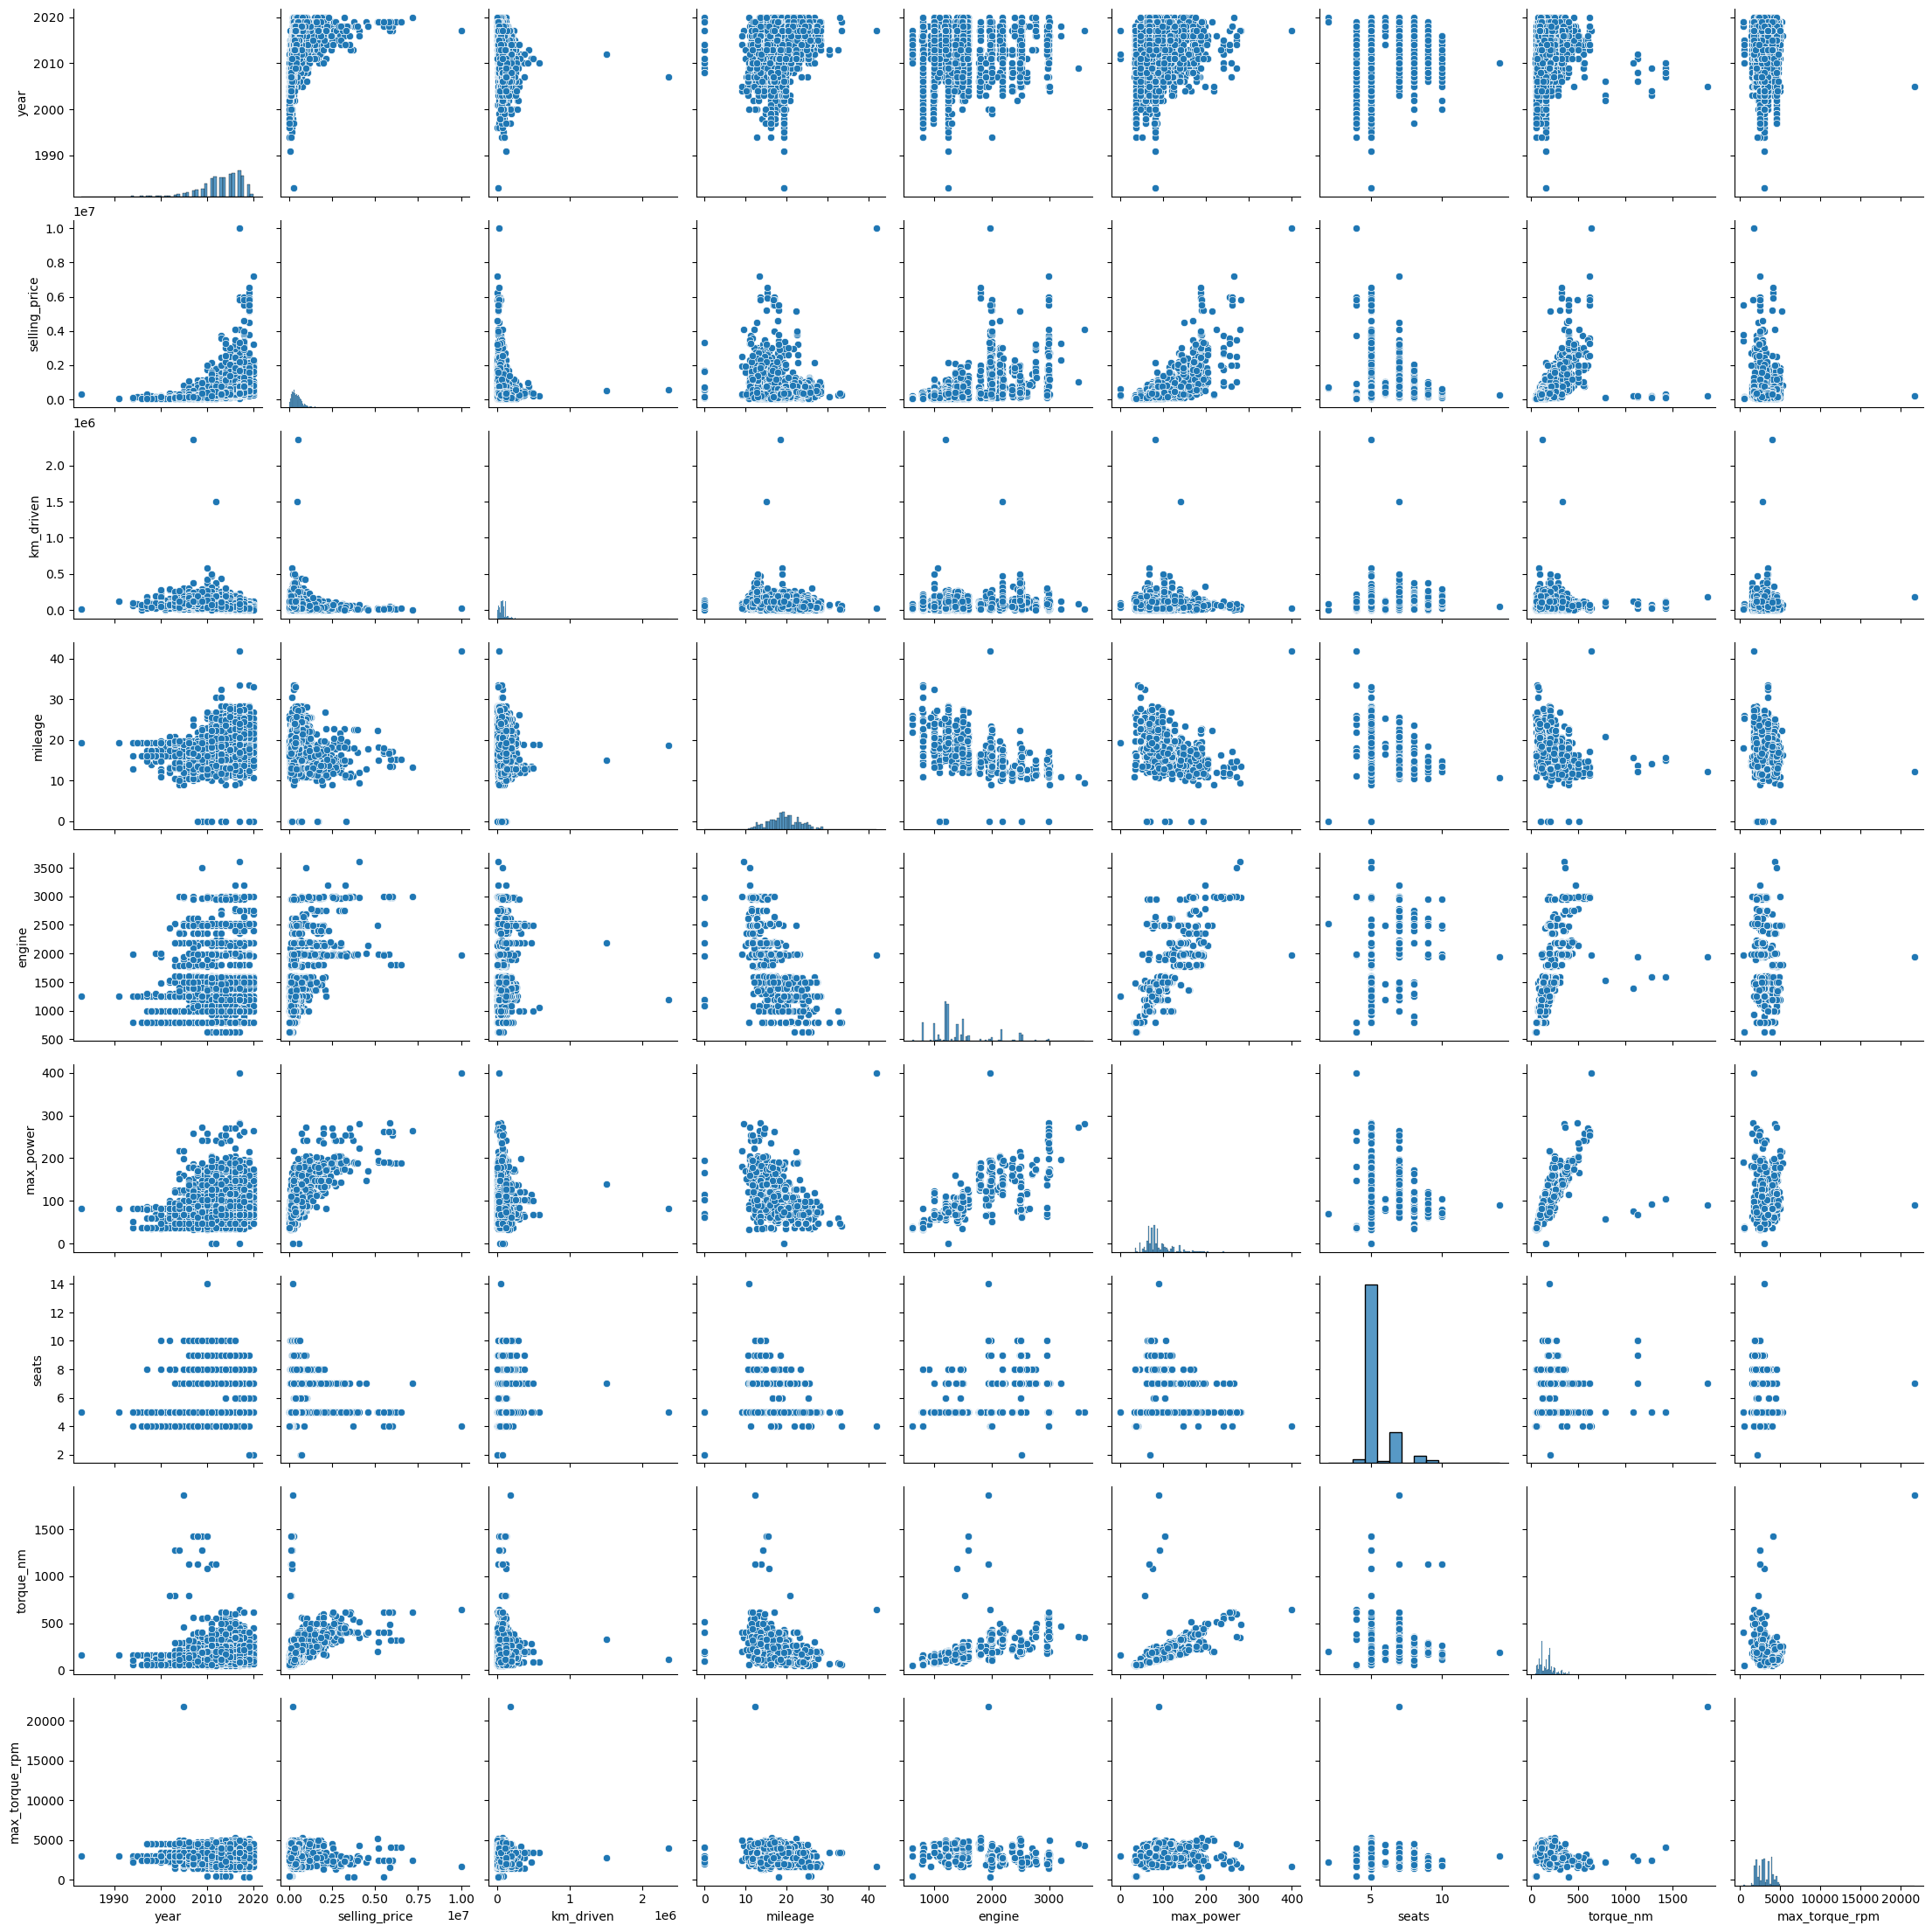

In [35]:
# your code here
plt.figure(figsize=(12,10), dpi=80)
sns.pairplot(df_train)
plt.show()

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

**Ответ:**
* Чем больше год, тем больше разброс цен, причем зависимость выглядит квадратичной
* Цены уменьшаются по мере роста пробега/километров или числа сидений
* Двигатель и мощность положительно влияют цену

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

<Figure size 960x800 with 0 Axes>

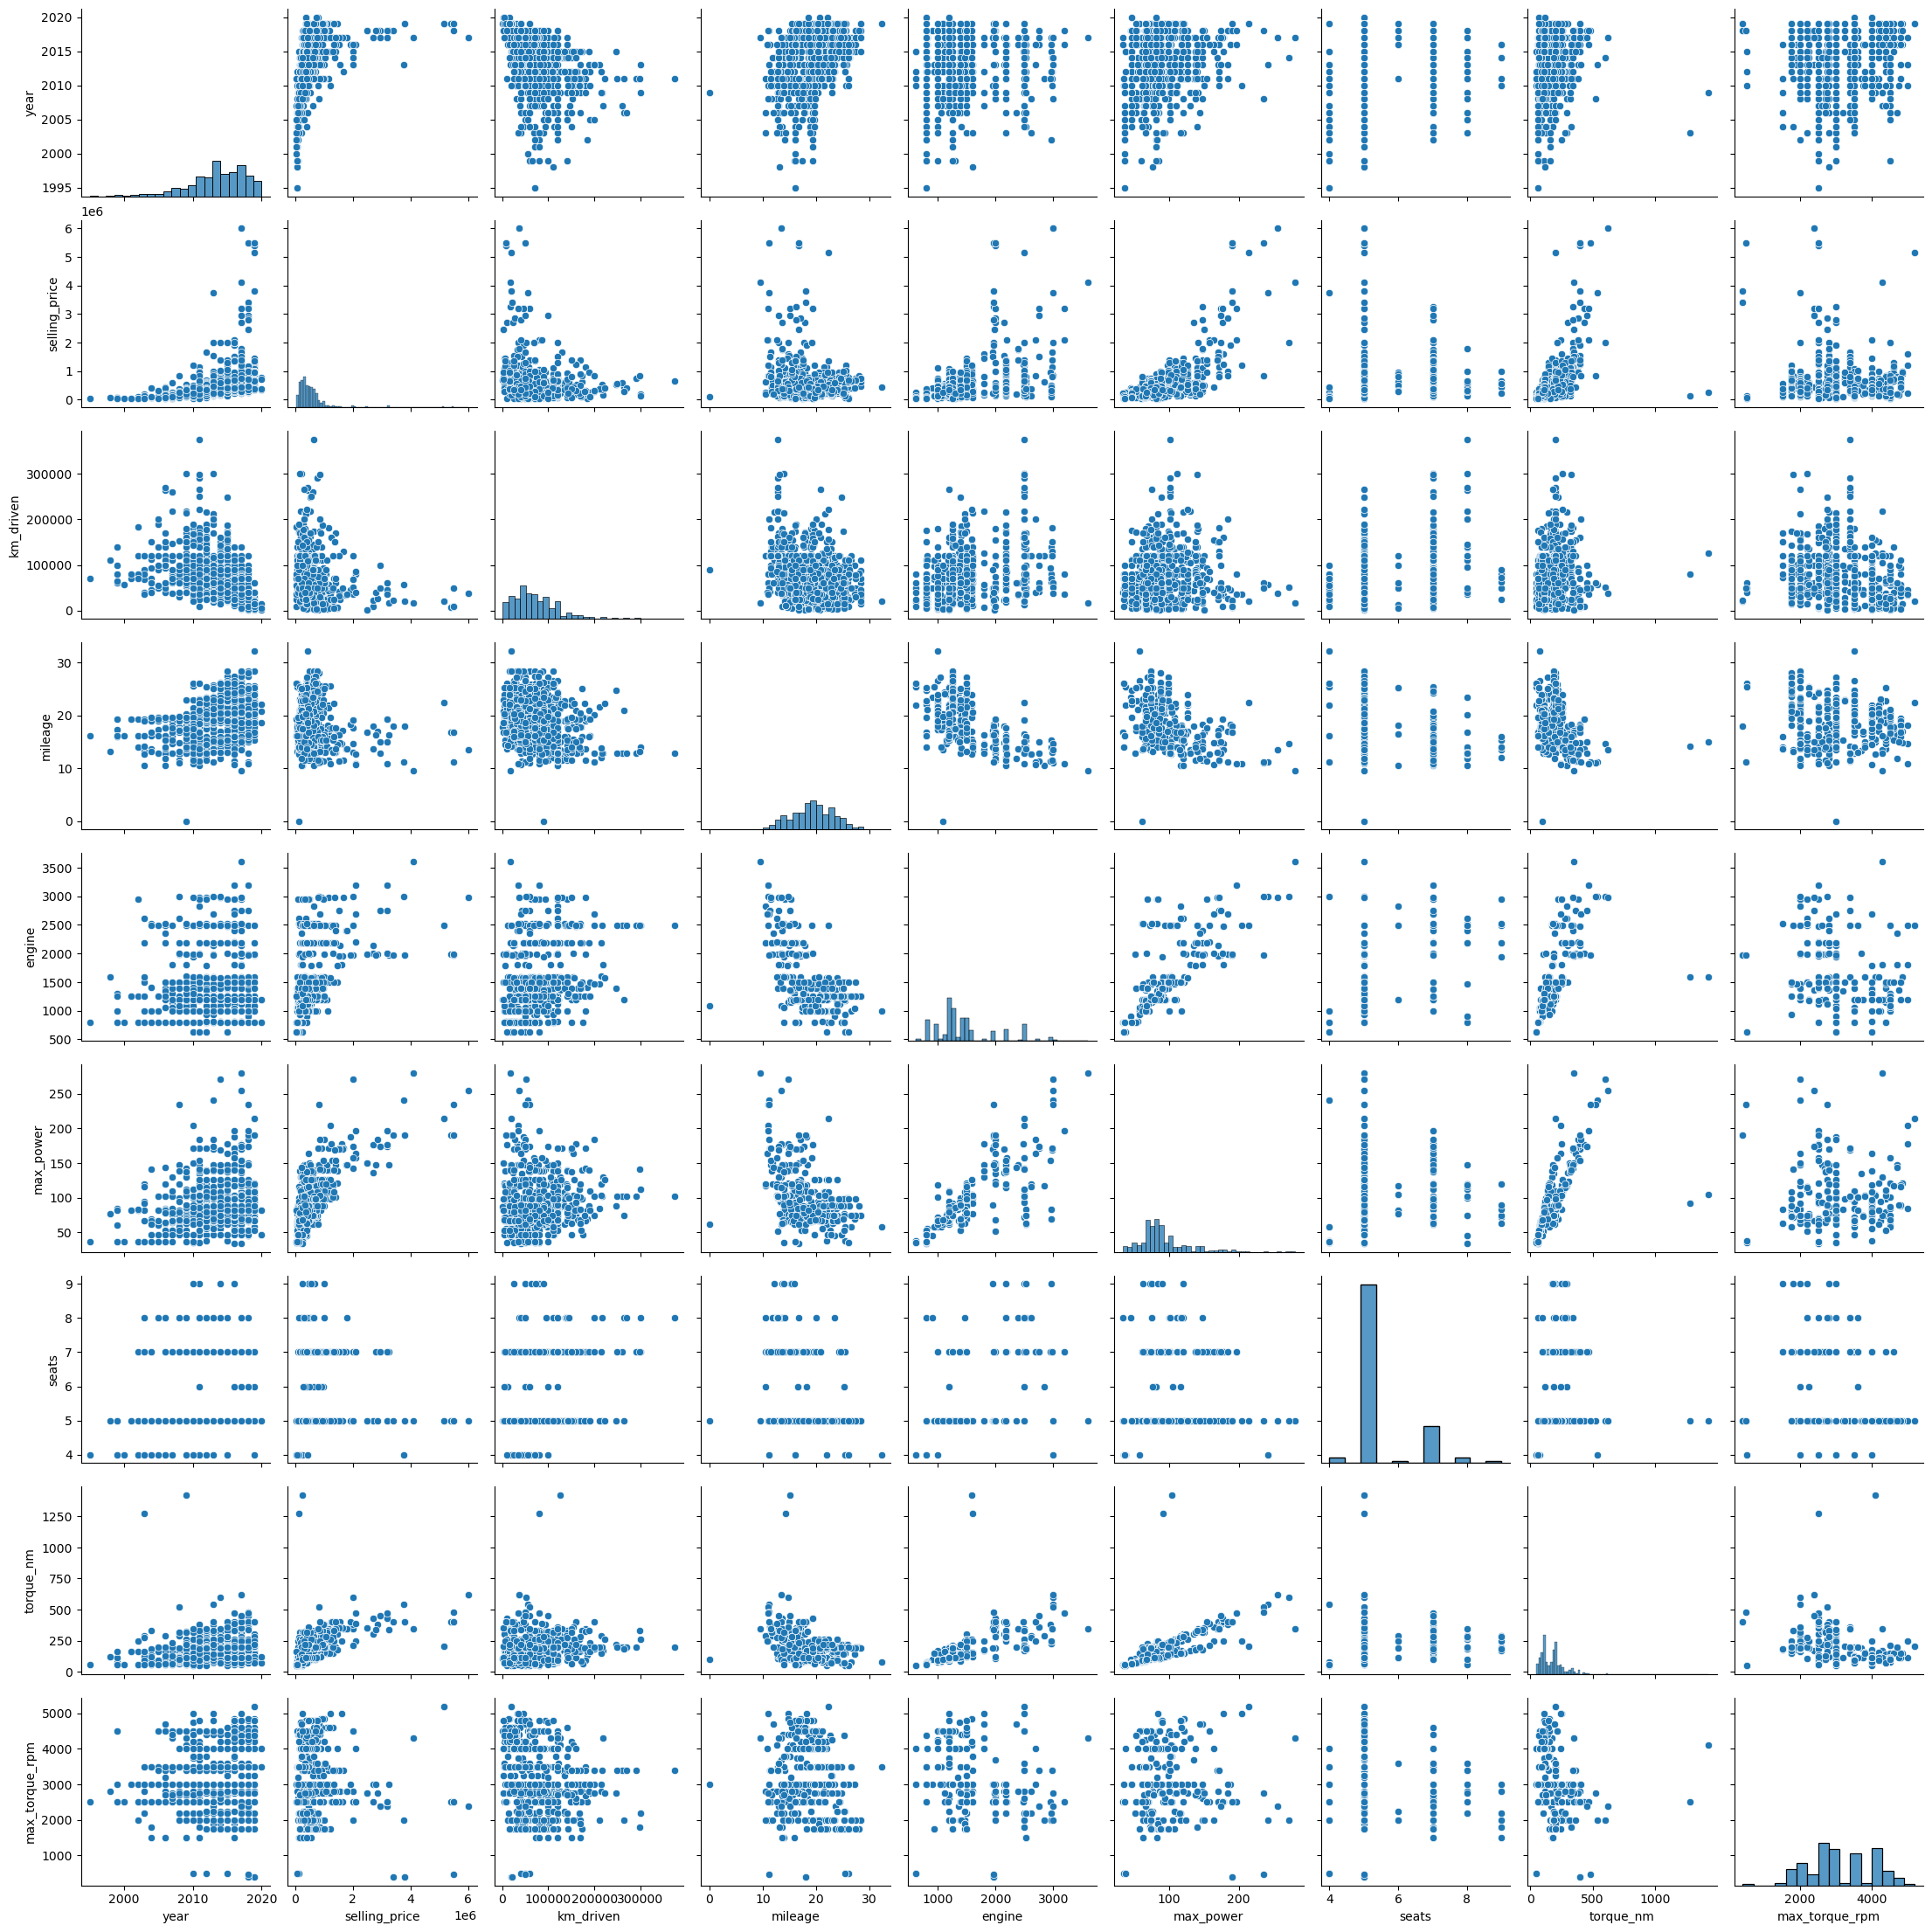

In [36]:
# your code here
plt.figure(figsize=(12,10), dpi=80)
sns.pairplot(df_test)
plt.show()

**Ответ:** да, распределения в целом похожи, но на тесте зависимости видны менее четко.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

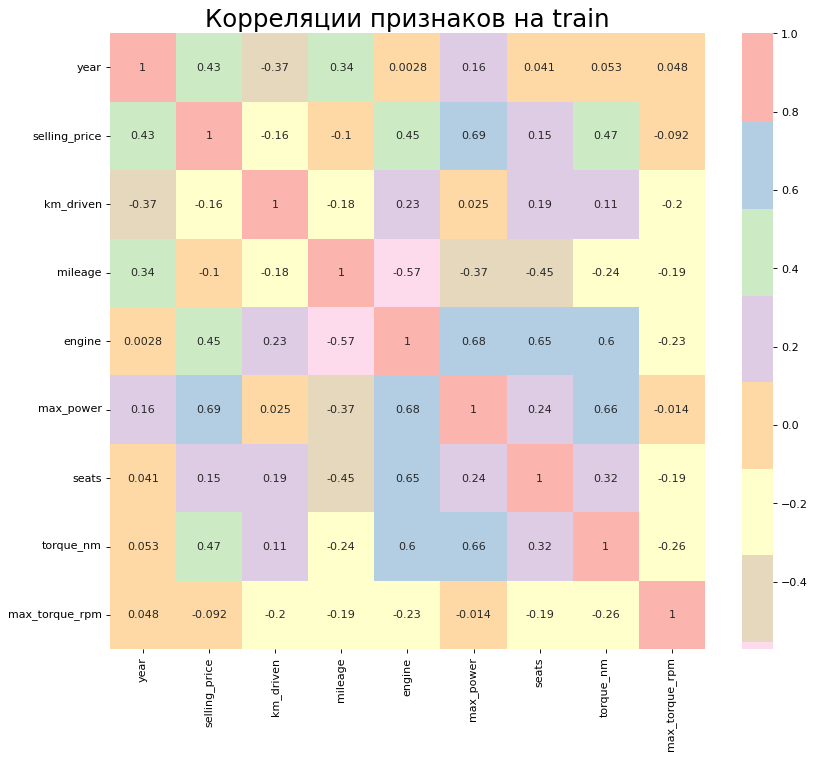

In [37]:
# your code here

plt.figure(figsize=(12,10), dpi=80)
sns.heatmap(df_train.corr(), xticklabels=df_train.corr().columns, yticklabels=df_train.corr().columns, cmap='Pastel1_r', center=0, annot=True)
plt.title('Корреляции признаков на train', fontsize=22)
plt.show()

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

**Ответ:**
* Меньше всего скоррелированы количество мест и двигатель
* Engine и max_power, engine и число мест
* Да, в принципе можно, между годом и ценой неплохая положительная корреляция

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

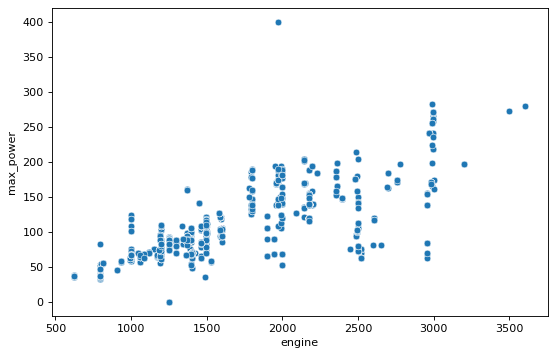

In [38]:
# your code here
plt.figure(figsize=(8,5), dpi=80)
sns.scatterplot(x=df_train['engine'], y=df_train['max_power'])
plt.xlabel('engine')
plt.ylabel('max_power')
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [39]:
# your code here

def feature_density(m):
    sns.set(rc={'figure.figsize':(7,5)})
    snsplot = sns.kdeplot(df_train[m], shade=True, label=m)
    fig = snsplot.get_figure()
    plt.legend()

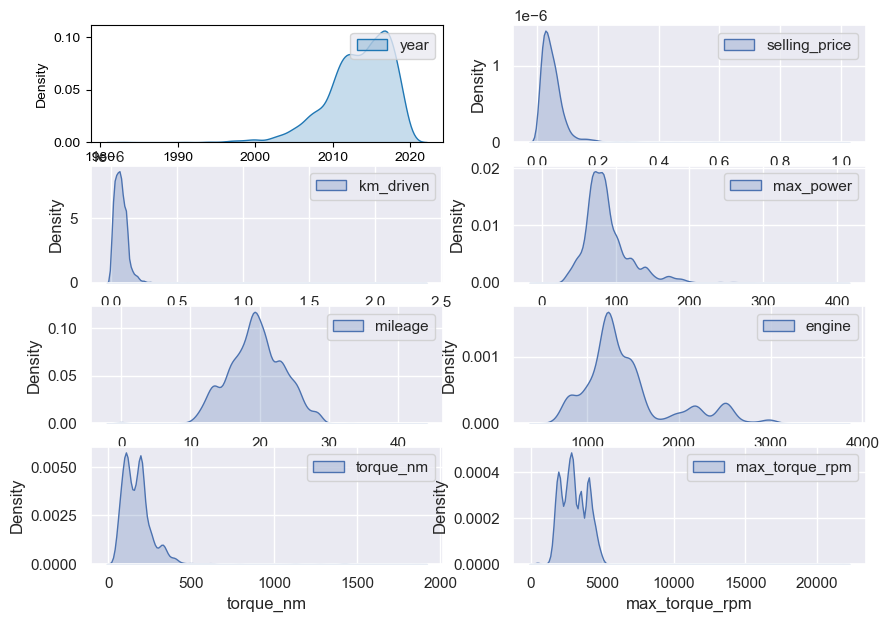

In [40]:
fig = plt.figure(figsize = (10, 7))
fig.add_subplot(421)
feature_density('year')

fig.add_subplot(422)
feature_density('selling_price')

fig.add_subplot(423)
feature_density('km_driven')

fig.add_subplot(424)
feature_density('max_power')

fig.add_subplot(425)
feature_density('mileage')

fig.add_subplot(426)
feature_density('engine')

fig.add_subplot(427)
feature_density('torque_nm')

fig.add_subplot(428)
feature_density('max_torque_rpm')

*Почти все распределения, особенно max_torque_rpm, torque_nm, engine, max_power, очень не похожи на нормальное распределение.*

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [41]:
y_train = df_train['selling_price']
X_train = df_train.drop('selling_price', axis=1).select_dtypes(include=['float64', 'int64'])

In [42]:
X_train.head()

,year,km_driven,mileage,engine,max_power,seats,torque_nm,max_torque_rpm
0,2014,145500,23.40,1248,74.00,5,190.000000,2000.0
1,2014,120000,21.14,1498,103.52,5,250.000000,2500.0
2,2010,127000,23.00,1396,90.00,5,219.668960,2750.0
3,2007,120000,16.10,1298,88.20,5,112.776475,4500.0
4,2017,45000,20.14,1197,81.86,5,113.750000,4000.0


In [43]:
assert X_train.shape == (5840, 8) # поменяла на 8 признаков

In [44]:
y_test = df_test['selling_price']
X_test = df_test.drop('selling_price', axis=1).select_dtypes(include=['float64', 'int64'])

In [45]:
assert X_test.shape == (1000, 8) # поменяла на 8 признаков

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here

model = LinearRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('R^2: {}, MSE: {}'.format(r2_score(y_test, prediction), MSE(y_test, prediction)))

R^2: 0.6056681619626085, MSE: 226673200901.28668


In [47]:
model.coef_

array([ 4.06900417e+04, -8.16890833e-01, -2.86648230e+03,  4.07268783e+01,
        1.04405683e+04, -3.09634309e+04,  6.28229514e+01, -6.96517302e+01])

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [48]:
from sklearn.preprocessing import StandardScaler

# your code here
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)
prediction = model.predict(X_test_scaled)

print('R^2: {}, MSE: {}'.format(r2_score(y_test, prediction), MSE(y_test, prediction)))

R^2: 0.6056681619626096, MSE: 226673200901.2861


In [49]:
# сохраняем масштабирование признаков для модели №1 (без feature engineering)

with open('standard_scaler_base.pkl', 'wb') as to_write:
    pickle.dump(scaler, to_write)
    
# эту модель пока не сохраняем, т.к. она не самая оптимальная

In [50]:
model.coef_

array([166636.75911648, -49067.35922471, -11424.74323763,  19777.83757723,
       330315.66487557, -30414.13472115,   6730.59884959, -63954.1082792 ])

In [51]:
X_test.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'torque_nm', 'max_torque_rpm'],
      dtype='object')

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [52]:
# your code here

print("Довольно информативным оказался год: у него вышел большой вес в модели относительно других переменных того же масштаба.")

Довольно информативным оказался год: у него вышел большой вес в модели относительно других переменных того же масштаба.


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [53]:
from sklearn.linear_model import Lasso

# your code here

model_lasso = Lasso() #  default alpha=1
model_lasso.fit(X_train_scaled, y_train)
prediction_lasso = model_lasso.predict(X_test_scaled)

print('R^2: {}, MSE: {}'.format(r2_score(y_test, prediction_lasso), MSE(y_test, prediction_lasso)))

R^2: 0.6056668075054712, MSE: 226673979481.92664


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [54]:
# your code here

print("Weights: ", model_lasso.coef_)
print("Intercept: ", model_lasso.intercept_)

Weights:  [166634.72137587 -49066.45144268 -11421.55762718  19776.27757556
 330316.85398079 -30410.44306071   6729.86418858 -63952.05149869]
Intercept:  522960.09109588637


**Ответ:** нет, не занулила, т.к. не было риска переобучения.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится фукнция [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [55]:
from sklearn.model_selection import GridSearchCV

# your code here

parameters = {'alpha': np.arange(0.01, 1.01, 0.01)}

model_lasso_cv = GridSearchCV(model_lasso, parameters, cv=10, scoring='r2')
model_lasso_cv.fit(X_train_scaled, y_train)

prediction_lasso_cv = model_lasso_cv.predict(X_test_scaled)

print('R^2: {}, MSE: {}'.format(r2_score(y_test, prediction_lasso_cv), MSE(y_test, prediction_lasso_cv)))

R^2: 0.6056668075054712, MSE: 226673979481.92664


In [56]:
model_lasso_cv.best_score_

0.5756131757717997

In [57]:
model_lasso_cv.best_params_

{'alpha': 1.0}

In [58]:
model_lasso_cv.best_estimator_.coef_

array([166634.72137587, -49066.45144268, -11421.55762718,  19776.27757556,
       330316.85398079, -30410.44306071,   6729.86418858, -63952.05149869])

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [59]:
print(len(np.arange(0.01, 1.01, 0.01))) # вот столько

100


<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

**Ответ:** в итоге наилучшим значением alpha оказалось значение по умолачнию=1, и здесь все так же нет зануленных весов.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [60]:
from sklearn.linear_model import ElasticNet

parameters = {'alpha': np.arange(0.01, 1.01, 0.01), 'l1_ratio': np.arange(0.001, 1.00001, 0.01)}

model_elastic = ElasticNet()

model_elastic_cv = GridSearchCV(model_elastic, parameters, cv=10)
model_elastic_cv.fit(X_train_scaled, y_train)

prediction_elastic_cv = model_elastic_cv.predict(X_test_scaled)

print('R^2: {}, MSE: {}'.format(r2_score(y_test, prediction_elastic_cv), MSE(y_test, prediction_elastic_cv)))

R^2: 0.579064794459751, MSE: 241965576218.07303


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [61]:
# your code here
model_elastic_cv.best_estimator_ # вот такие

ElasticNet(alpha=0.93, l1_ratio=0.8809999999999999)

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [62]:
# your code here
X_train_cat = df_train.drop(['selling_price', 'name'], axis=1)
X_test_cat = df_test.drop(['selling_price', 'name'], axis=1)

In [63]:
assert X_train_cat.shape == (5840, 12) # поменяла число признаков на 12

In [64]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [65]:
# вернем seats к текстовому формату, чтобы они попали в encoding
X_train_cat['seats'] = list(map(str, X_train_cat['seats']))
X_test_cat['seats'] = list(map(str, X_test_cat['seats']))

In [66]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats']])

X_train_cat_dum = enc.transform(X_train_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats']]).toarray()
X_test_cat_dum = enc.transform(X_test_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats']]).toarray()

In [67]:
# сохраняем эту кодировку

with open('one_hot_encoder.pkl', 'wb') as to_write:
    pickle.dump(enc, to_write)

In [68]:
# теперь присоединим дамми-столбцы к масштабированным числовым признакам

X_train_cat_dum = pd.DataFrame(X_train_cat_dum, columns=list(enc.get_feature_names_out()))
X_test_cat_dum = pd.DataFrame(X_test_cat_dum , columns=list(enc.get_feature_names_out()))

X_train_cat_dum[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque_nm', 'max_torque_rpm']] = X_train_scaled
X_test_cat_dum[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque_nm', 'max_torque_rpm']] = X_test_scaled

X_train_cat_dum.drop('seats', axis=1, inplace=True)
X_test_cat_dum.drop('seats', axis=1, inplace=True)

In [69]:
# боремся с мультиколлинеарностью

for col in ['fuel_CNG', 'seller_type_Dealer', 'transmission_Automatic', 'owner_First Owner', 'seats_10']:
    X_train_cat_dum.drop(col, axis=1, inplace=True)
    X_test_cat_dum.drop(col, axis=1, inplace=True)

In [70]:
X_train_cat_dum.head()

,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,...,seats_7,seats_8,seats_9,year,km_driven,mileage,engine,max_power,torque_nm,max_torque_rpm
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.139570,1.191152,0.995867,-0.373643,-0.439550,0.136673,-1.131162
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.139570,0.766619,0.428830,0.141162,0.493513,0.696709,-0.586618
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.837167,0.883158,0.895506,-0.068879,0.066175,0.413601,-0.314345
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.569719,0.766619,-0.835712,-0.270682,0.009281,-0.584126,1.591561
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.872122,-0.482007,0.177929,-0.478663,-0.191113,-0.575040,1.047016


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [71]:
X_train_cat_dum.columns

Index(['fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seats_14', 'seats_2',
       'seats_4', 'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9',
       'year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque_nm',
       'max_torque_rpm'],
      dtype='object')

In [72]:
X_test_cat_dum.columns

Index(['fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seats_14', 'seats_2',
       'seats_4', 'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9',
       'year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque_nm',
       'max_torque_rpm'],
      dtype='object')

In [73]:
# проверка что признаки нормально расположены
X_train_cat_dum.columns == X_test_cat_dum.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [74]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

model_ridge = Ridge()

parameters = {'alpha': np.arange(0.00001, 1.010001, 0.01)}

model_ridge_cv = GridSearchCV(model_ridge, parameters, cv=10, scoring='r2')
model_ridge_cv.fit(X_train_cat_dum, y_train)

prediction_ridge_cv = model_ridge_cv.predict(X_test_cat_dum)

print('R^2: {}, MSE: {}'.format(r2_score(y_test, prediction_ridge_cv), MSE(y_test, prediction_ridge_cv)))

R^2: 0.6446616000379763, MSE: 204258659213.0459


**Ответ:** да, немного удалось улучшить R^2, но изменения не очень значительные. Также уменьшилась среднеквадратичная ошибка.

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

Text(0.5, 1.0, 'Boxplot для train')

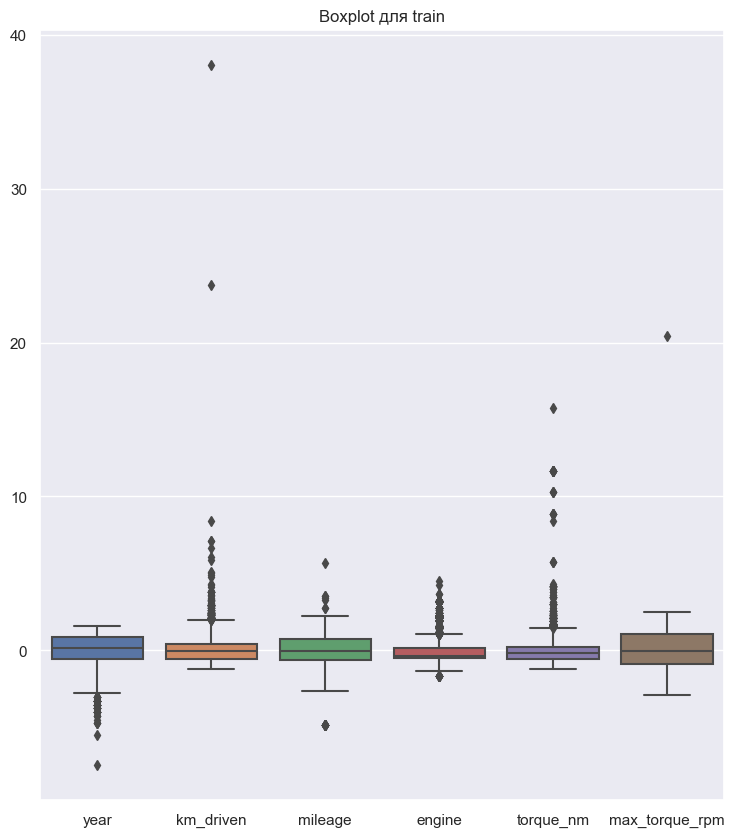

In [75]:
# посмотрим на выбросы
fig = plt.figure(figsize = (30, 10))

fig.add_subplot(131)
sns.boxplot(data=X_train_cat_dum[['year', 'km_driven', 'mileage', 'engine', 'torque_nm', 'max_torque_rpm']])
plt.title('Boxplot для train', fontsize=12)

*Если изучить, что именно находится в этих выбросах, то можно найти старые машины с очень низакой ценой, по которым может быть не очень релевантно обучать модель, или машины с очень мощными характеристиками относительно среднего.*

In [76]:
lower_bound = X_train_cat_dum['year'].quantile(q=0.025)
to_old = X_train_cat_dum[X_train_cat_dum['year'] < lower_bound]
df_train.iloc[to_old.index].head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_nm,max_torque_rpm
6,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796,37.00,4,59.0,2500.0
16,Maruti Alto LX,2002,150000,80000,Petrol,Individual,Manual,Second Owner,19.70,796,46.30,5,62.0,3000.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,19.37,1248,81.86,5,160.0,3000.0
69,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,19.37,1248,81.86,5,160.0,3000.0
157,Maruti 800 Std,1999,40000,40000,Petrol,Individual,Manual,Second Owner,16.10,796,37.00,4,59.0,2500.0


In [77]:
# Шаг 1: добавим марку как дамми-переменную

# Проблема такого подхода: в трейне не все возможные марки, поэтому прогноз для отсутствующей в трейне марке может быть неточным

def car_name(el):
    return el.split()[0]

X_train_cat['mark'] = list(map(car_name, df_train['name']))
X_test_cat['mark'] = list(map(car_name, df_test['name']))

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats', 'mark']])

X_train_cat_dum = enc.transform(X_train_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats', 'mark']]).toarray()
X_test_cat_dum = enc.transform(X_test_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats', 'mark']]).toarray()

In [78]:
# сохраняем получившуюся кодировку
with open('one_hot_encoder_with_cars.pkl', 'wb') as to_write:
    pickle.dump(enc, to_write)

In [79]:
# объединяем в один датасет
X_train_cat_dum = pd.DataFrame(X_train_cat_dum, columns=list(enc.get_feature_names_out()))
X_test_cat_dum = pd.DataFrame(X_test_cat_dum, columns=list(enc.get_feature_names_out()))

X_train_cat_dum[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque_nm', 'max_torque_rpm']] = X_train_scaled
X_test_cat_dum[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque_nm', 'max_torque_rpm']] = X_test_scaled

X_train_cat_dum.drop('seats', axis=1, inplace=True)
X_test_cat_dum.drop('seats', axis=1, inplace=True)

In [80]:
# Шаг 2: новые признаки из существующих

X_train_cat_dum['engine_to_capacity'] = X_train_cat_dum['max_power']/X_train_cat_dum['engine'] #  мощность двигателя к объему
X_test_cat_dum['engine_to_capacity'] = X_test_cat_dum['max_power']/X_train_cat_dum['engine']

X_train_cat_dum['year2'] = X_train_cat_dum['year']**2 #  посмотрим на квадратичную зависимость между годом и ценой
X_test_cat_dum['year2'] = X_test_cat_dum['year']**2

X_train_cat_dum['km_driven2'] = X_train_cat_dum['km_driven']**2 #  посмотрим на квадратичную зависимость между годом и km_driven
X_test_cat_dum['km_driven2'] = X_test_cat_dum['km_driven']**2

X_train_cat_dum['engine2'] = X_train_cat_dum['engine']**2 #  посмотрим на квадратичную зависимость между годом и engine
X_test_cat_dum['engine2'] = X_test_cat_dum['engine']**2

X_train_cat_dum['max_power2'] = X_train_cat_dum['max_power']**2 #  посмотрим на квадратичную зависимость между годом и max_power
X_test_cat_dum['max_power2'] = X_test_cat_dum['max_power']**2

#X_train_cat_dum['torque_nm'] = list(map(np.log, X_train_cat_dum['torque_nm']))
#X_train_cat_dum['max_torque_rpm'] = list(map(np.log, X_train_cat_dum['max_torque_rpm']))

#X_test_cat_dum['torque_nm'] = list(map(np.log, X_test_cat_dum['torque_nm']))
#X_test_cat_dum['max_torque_rpm'] = list(map(np.log, X_test_cat_dum['max_torque_rpm']))

In [81]:
# такие теперь признаки
for col in ['fuel_CNG', 'seller_type_Dealer', 'transmission_Automatic', 'owner_First Owner', 'seats_10', 'mark_Ambassador']:
    X_train_cat_dum.drop(col, axis=1, inplace=True)
    X_test_cat_dum.drop(col, axis=1, inplace=True)

X_train_cat_dum.columns

Index(['fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seats_14', 'seats_2',
       'seats_4', 'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9',
       'mark_Audi', 'mark_BMW', 'mark_Chevrolet', 'mark_Daewoo', 'mark_Datsun',
       'mark_Fiat', 'mark_Force', 'mark_Ford', 'mark_Honda', 'mark_Hyundai',
       'mark_Isuzu', 'mark_Jaguar', 'mark_Jeep', 'mark_Kia', 'mark_Land',
       'mark_Lexus', 'mark_MG', 'mark_Mahindra', 'mark_Maruti',
       'mark_Mercedes-Benz', 'mark_Mitsubishi', 'mark_Nissan', 'mark_Peugeot',
       'mark_Renault', 'mark_Skoda', 'mark_Tata', 'mark_Toyota',
       'mark_Volkswagen', 'mark_Volvo', 'year', 'km_driven', 'mileage',
       'engine', 'max_power', 'torque_nm', 'max_torque_rpm',
       'engine_to_capacity', 'year2', 'km_driven2', 'engine2', 'max_power2'],
      

In [82]:
# проверяем что все ок со столбцами
X_test_cat_dum.columns == X_train_cat_dum.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [83]:
# Шаг 3: попробуем обучить elastic регрессию на новых данных

parameters = {'alpha': np.arange(0.01, 10.01, 0.1), 'l1_ratio': np.arange(0.0001, 1.0001, 0.1)}

model_elastic = ElasticNet()

model_elastic_cv_upd = GridSearchCV(model_elastic, parameters, cv=10)
model_elastic_cv_upd.fit(X_train_cat_dum, y_train)

prediction_elastic_cv_upd = model_elastic_cv_upd.predict(X_test_cat_dum)

print('R^2: {}, MSE: {}'.format(r2_score(y_test, prediction_elastic_cv_upd), MSE(y_test, prediction_elastic_cv_upd)))

R^2: 0.790866435313641, MSE: 120215944924.17894


In [84]:
# сохраняем получившуюся модель
with open('model_elastic_with_cars.pkl', 'wb') as to_write:
    pickle.dump(model_elastic_cv_upd, to_write)

In [85]:
# такие подобрались гиперпараметры
model_elastic_cv_upd.best_estimator_

ElasticNet(alpha=0.01, l1_ratio=0.9001)

In [86]:
# такие получились веса
print(list(map(print, X_test_cat_dum.columns, model_elastic_cv_upd.best_estimator_.coef_)))

fuel_Diesel 135576.52049075192
fuel_LPG 98578.78845981804
fuel_Petrol 35842.95421869927
seller_type_Individual -83533.91151150427
seller_type_Trustmark Dealer -48892.33082205774
transmission_Manual -75873.00864123006
owner_Fourth & Above Owner -36539.01265523571
owner_Second Owner -34327.60443512744
owner_Test Drive Car 1228090.7776802715
owner_Third Owner -20792.043998091005
seats_14 -8749.939677258031
seats_2 -69809.73447112352
seats_4 62983.220054422905
seats_5 -14361.76547121383
seats_6 -54781.96355066654
seats_7 37639.82604645464
seats_8 -2368.461099029721
seats_9 25795.641529337005
mark_Audi 307688.92294652964
mark_BMW 689956.248736316
mark_Chevrolet -249291.2018258751
mark_Daewoo 4205.747126285469
mark_Datsun -320878.40190448135
mark_Fiat -194988.76824160645
mark_Force -115547.54790975628
mark_Ford -206957.25791365776
mark_Honda -164272.01779064443
mark_Hyundai -158567.37014645853
mark_Isuzu 73748.09606358502
mark_Jaguar 84817.0847295746
mark_Jeep 23149.22416596808
mark_Kia 1972

In [87]:
# такой получился свободный член регрессии
model_elastic_cv_upd.best_estimator_.intercept_

669896.8067830808

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [88]:
def business_metrics(y_true, y_pred):
    # your code here
    count = 0
    for i in range(len(y_true)):
        if 0.9 * y_true[i] <= y_pred[i] <= 1.1 * y_true[i]:
            count += 1
    share = count/len(y_true)
    return share
            

business_metrics(y_test, prediction_elastic_cv_upd) # получилось как-то не очень много

0.289

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [89]:
from fastapi import FastAPI, Request, Form, File, UploadFile
from pydantic import BaseModel
from typing import List
import re
import numpy as np
import pandas as pd
from typing import Union
from pickle import load
#from fastapi.templating import Jinja2Templates
#from fastapi.staticfiles import StaticFiles
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
#import os
#import csv

#templates = Jinja2Templates(directory="templates")

app = FastAPI()

# так вводятся данные для одного элемента
class Item(BaseModel):
    name: str
    year: int
    selling_price: Union[int, None] = None
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float

class Items(BaseModel):
    objects: List[Item]

# функция для обработки torque

def for_torque(el):
    try:
        n = re.findall('\d+[,| . ]\d+|\d+', el)
        tor = float(n[0].replace(',', ''))
        max_tor = float(n[-1].replace(',', ''))
        
        if re.findall('nm', el.lower()) != []:
            unit = 'nm'
        elif re.findall('kgm', el.lower()) != []:
            unit = 'kgm'
            tor *= 9.80665
        else:
            unit = 'CHECK'
            
    except:
        tor = np.nan
        max_tor = np.nan
        unit = np.nan
    return tor, max_tor

def to_float(el):
    try:
        if re.findall('\d+\.\d+', el) != []:
            return float(re.findall('\d+\.\d+', el)[0])
        else:
            return float(re.findall('\d+', el)[0])
    except:
        return np.nan  #  операция не сработает только для пропусков

def car_name(el):
    return el.split()[0]

@app.post("/predict_item")
async def predict_item(item: Item) -> float:

    # форматирование признаков
    year = item.year
    selling_price = item.selling_price
    km_driven = item.km_driven
    fuel = item.fuel
    seller_type = item.seller_type
    transmission = item.transmission
    owner = item.owner
    mileage = to_float(item.mileage)
    engine = to_float(item.engine)
    max_power = to_float(item.max_power)
    torque_nm, max_torque_rpm = for_torque(item.torque)
    mark = item.name.split()[0]
    seats = int(item.seats) # int

    # формируем векторы
    X = pd.DataFrame(np.array([year, km_driven, mileage, engine, max_power, seats, torque_nm, max_torque_rpm]).reshape(1,8), columns=['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque_nm', 'max_torque_rpm'])
    X_cat = pd.DataFrame(np.array([fuel, seller_type, transmission, owner, seats, mark]).reshape(1,6), columns=['fuel', 'seller_type', 'transmission', 'owner', 'seats', 'mark'])
    print(list(X_cat.to_numpy()))

    # масштабирование
    scaler = load(open('standard_scaler_base.pkl', 'rb'))
    X_scaled = pd.DataFrame(scaler.transform(X))

    # кодирование категориальных переменных
    enc = load(open('one_hot_encoder_with_cars.pkl', 'rb'))
    X_dummies = enc.transform(X_cat).toarray()
    X_data = pd.DataFrame(X_dummies, columns=list(enc.get_feature_names_out()))
    X_data['year'] = X_scaled[0]
    X_data['km_driven'] = X_scaled[1]
    X_data['mileage'] = X_scaled[2]
    X_data['engine'] = X_scaled[3]
    X_data['max_power'] = X_scaled[4]
    X_data['seats'] = X_scaled[5]
    X_data['torque_nm'] = X_scaled[6]
    X_data['max_torque_rpm'] = X_scaled[7]
    X_data.drop('seats', axis=1, inplace=True)
    

    # формируем новые признаки
    X_data['engine_to_capacity'] = X_data['max_power']/X_data['engine'] #  мощность двигателя к объему
    X_data['year2'] = X_data['year']**2 #  посмотрим на квадратичную зависимость между годом и ценой
    X_data['km_driven2'] = X_data['km_driven']**2 #  посмотрим на квадратичную зависимость между годом и km_driven
    X_data['engine2'] = X_data['engine']**2 #  посмотрим на квадратичную зависимость между годом и engine
    X_data['max_power2'] = X_data['max_power']**2 #  посмотрим на квадратичную зависимость между годом и max_power

    # боремся с мультиколлинеарностью
    for col in ['fuel_CNG', 'seller_type_Dealer', 'transmission_Automatic', 'owner_First Owner', 'seats_10', 'mark_Ambassador']:
        X_data.drop(col, axis=1, inplace=True)

    # предсказание
    model = load(open('model_elastic_with_cars.pkl', 'rb'))
    pred = model.predict(X_data)
    item.selling_price = int(pred[0])

    #return X_data
    return {'selling_price': item.selling_price}


def car_name(el):
    return el.split()[0]
def to_int(el):
    return int(el)

@app.post("/predict_items")
async def predict_items(items: List[Item]) -> List[float]:

    # формируем датасет
    X = pd.DataFrame()

    for i in items:
        X = X.append(dict(i), ignore_index=True)

    tor = []
    max_tor = []

    #return {'ans': list(X.columns)}
    
    for i in X['torque']:
        tor_v, max_tor_v = for_torque(i)
        tor.append(tor_v)
        max_tor.append(max_tor_v)
    X['torque_nm'] = tor
    X['max_torque_rpm'] = max_tor

    for feature in ['mileage', 'engine', 'max_power']:
        X[feature] = list(map(to_float, X[feature]))

    X.drop(['torque', 'selling_price'], axis=1, inplace=True)

    X['mark'] = list(map(car_name, X['name']))

    X_cat = pd.DataFrame(X[['fuel', 'seller_type', 'transmission', 'owner', 'seats', 'mark']])
    X = pd.DataFrame(X[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque_nm', 'max_torque_rpm']])

    # масштабирование
    scaler = load(open('standard_scaler_base.pkl', 'rb'))
    X_scaled = pd.DataFrame(scaler.transform(X))
    X_cat['seats']= list(map(int, X_cat['seats']))
    X_cat['seats']= list(map(str, X_cat['seats']))

    
    # кодирование категориальных переменных
    enc = load(open('one_hot_encoder_with_cars.pkl', 'rb'))
    
    print(list(X_cat.to_numpy()))
    X_dummies = enc.transform(X_cat.to_numpy()).toarray() #.to_numpy()
    X_data = pd.DataFrame(X_dummies, columns=list(enc.get_feature_names_out()))
    X_data['year'] = X_scaled[0]
    X_data['km_driven'] = X_scaled[1]
    X_data['mileage'] = X_scaled[2]
    X_data['engine'] = X_scaled[3]
    X_data['max_power'] = X_scaled[4]
    X_data['seats'] = X_scaled[5]
    X_data['torque_nm'] = X_scaled[6]
    X_data['max_torque_rpm'] = X_scaled[7]
    X_data.drop('seats', axis=1, inplace=True)


    # формируем новые признаки
    X_data['engine_to_capacity'] = X_data['max_power']/X_data['engine'] #  мощность двигателя к объему
    X_data['year2'] = X_data['year']**2 #  посмотрим на квадратичную зависимость между годом и ценой
    X_data['km_driven2'] = X_data['km_driven']**2 #  посмотрим на квадратичную зависимость между годом и km_driven
    X_data['engine2'] = X_data['engine']**2 #  посмотрим на квадратичную зависимость между годом и engine
    X_data['max_power2'] = X_data['max_power']**2 #  посмотрим на квадратичную зависимость между годом и max_power

    # боремся с мультиколлинеарностью
    for col in ['fuel_CNG', 'seller_type_Dealer', 'transmission_Automatic', 'owner_First Owner', 'seats_10', 'mark_Ambassador']:
        X_data.drop(col, axis=1, inplace=True)

    # предсказание
    model = load(open('model_elastic_with_cars.pkl', 'rb'))
    pred = model.predict(X_data)
    #selling_price = pred

    # оформление результатов
    for i in range(len(items)):
        items[i].selling_price = pred[i]
    

    #return {'result': X_data}
    return items

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* .ipynb-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* .py-файл с реализацией сервиса
* .pickle-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* .md-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит readme.md:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали до сюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link